# Utils

In [1]:
def plot_regression(estimator, X_train, y_train, X_test, y_test):
    x_axis = np.linspace(0, 64, 1000).reshape((-1, 1))
    y_axis = estimator.predict(x_axis)
    plt.figure(figsize=(20, 10))
    plt.grid()
    plt.xlim(-1, 64)
    plt.ylim(-2, 5)
    plt.title('Wealth prediction according to nightlight intensity')
    plt.xlabel('nightlight intensity')
    plt.ylabel('wealth')
    plt.scatter(X_train, y_train)
    plt.scatter(X_test, y_test, color='r')
    plt.plot(x_axis, y_axis)
    plt.show()

# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from models.LinearRegression import LinearRegression
from models.RidgeRegression import RidgeRegression

# Data

In [75]:
df_rwanda = pd.read_csv('./data/rwanda.csv')

X = df_rwanda['mean_light'].values.reshape((-1, 1))
y = df_rwanda['wealth_index'].values.reshape((-1, 1))

X_high, y_high, X_low, y_low = [], [], [], []
for i in range(X.shape[0]):
    if X[i][0] <= -1:
        X_low.append(X[i])
        y_low.append(y[i])
    else:
        X_high.append(X[i])
        y_high.append(y[i])
        
X_low = np.resize(X_low, (len(X_low), 1))
y_low = np.resize(y_low, (len(y_low), 1))
X_high = np.resize(X_high, (len(X_high), 1))
y_high = np.resize(y_high, (len(y_high), 1))

X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.40, random_state=42)

# Predictions

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import BayesianRidge

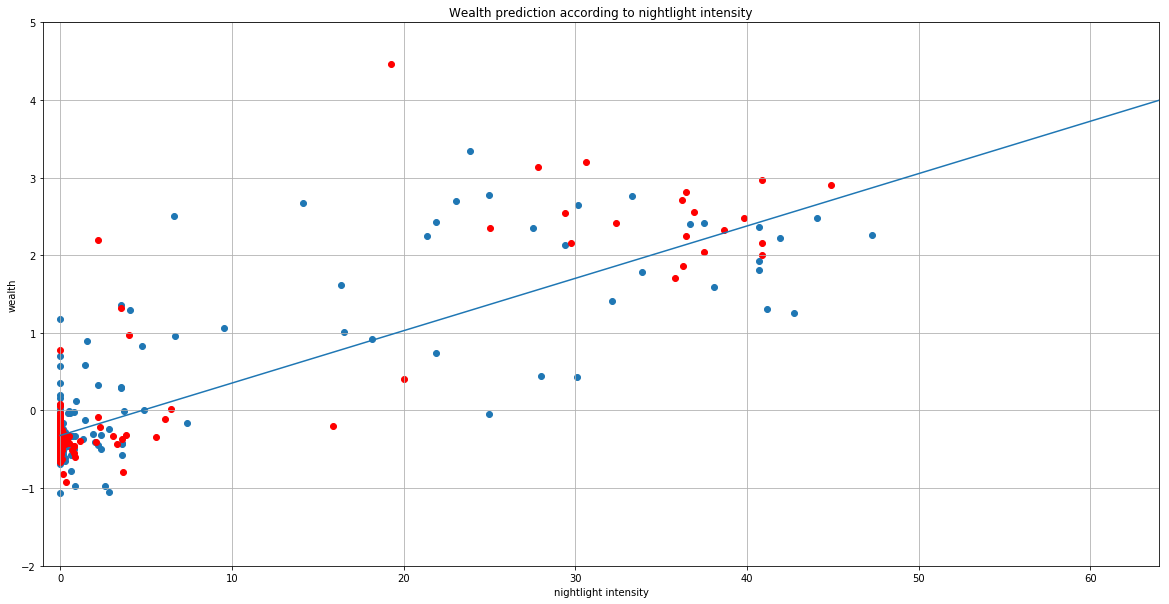

MSE on train data : 0.19
MSE on test data : 0.19
R2-score : 0.78


In [77]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

plot_regression(estimator, X_train, y_train, X_test, y_test)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

alpha =  401.4242490499322


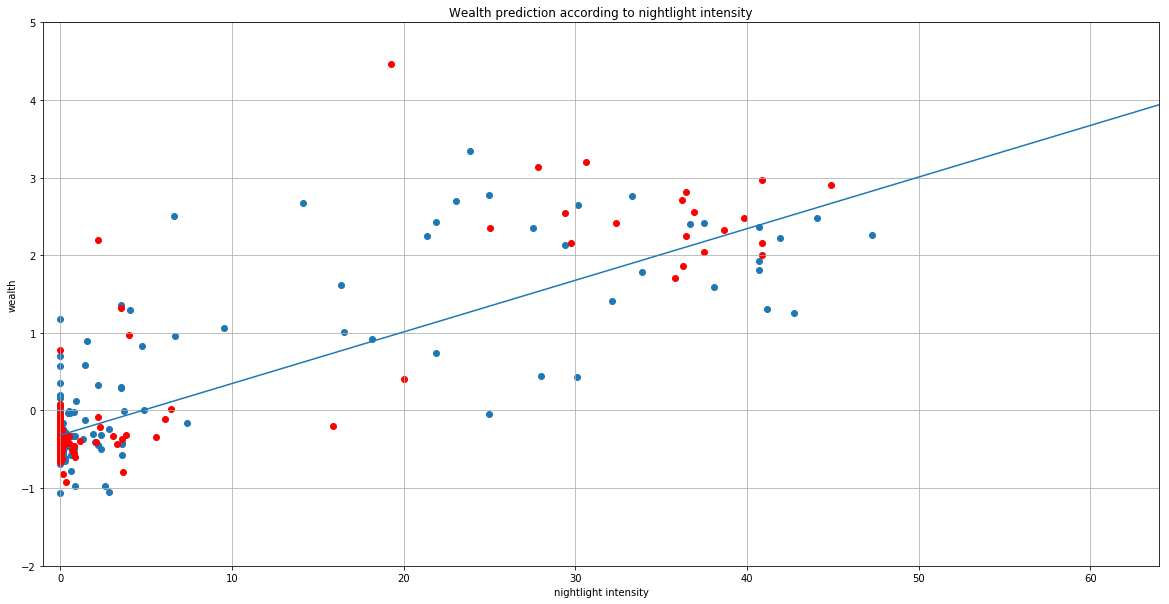

MSE on train data : 0.19
MSE on test data : 0.2
R2-score : 0.78


In [78]:
estimator = RidgeCV(alphas=np.logspace(0, 3, 1000))
estimator.fit(X_train, y_train)

print('alpha = ', estimator.alpha_)

plot_regression(estimator, X_train, y_train, X_test, y_test)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

/home/ridouane/anaconda3/envs/computer-vision/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ridouane/anaconda3/envs/computer-vision/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


alpha =  1.0


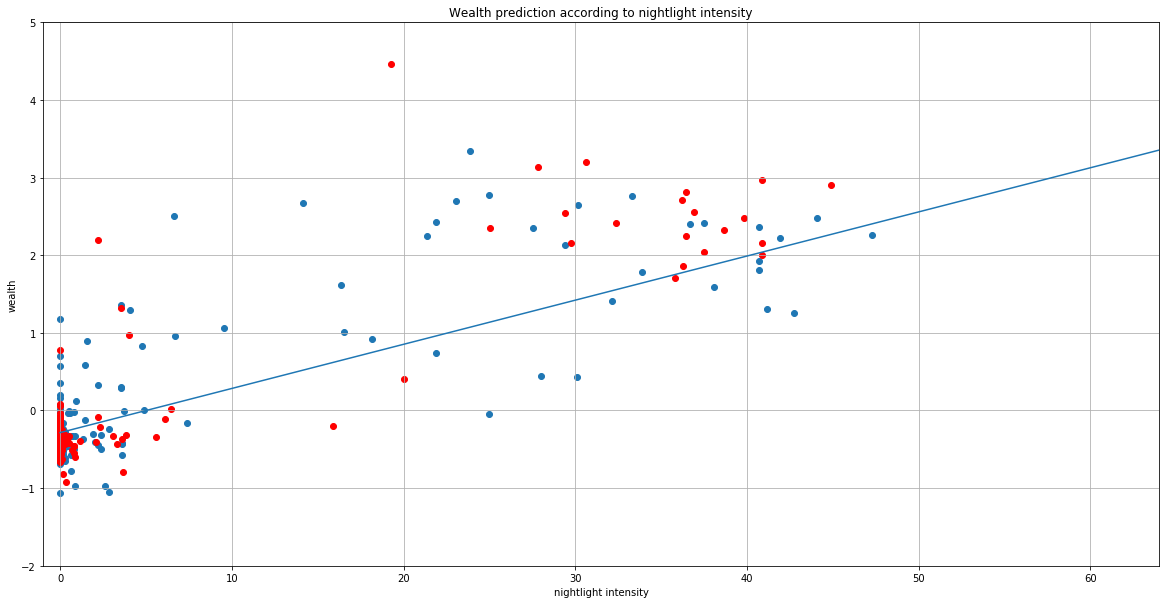

MSE on train data : 0.2
MSE on test data : 0.24
R2-score : 0.74


In [79]:
estimator = LassoCV(alphas=np.logspace(0, 16, 10))
estimator.fit(X_train, y_train)

print('alpha = ', estimator.alpha_)

plot_regression(estimator, X_train, y_train, X_test, y_test)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

/home/ridouane/anaconda3/envs/computer-vision/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


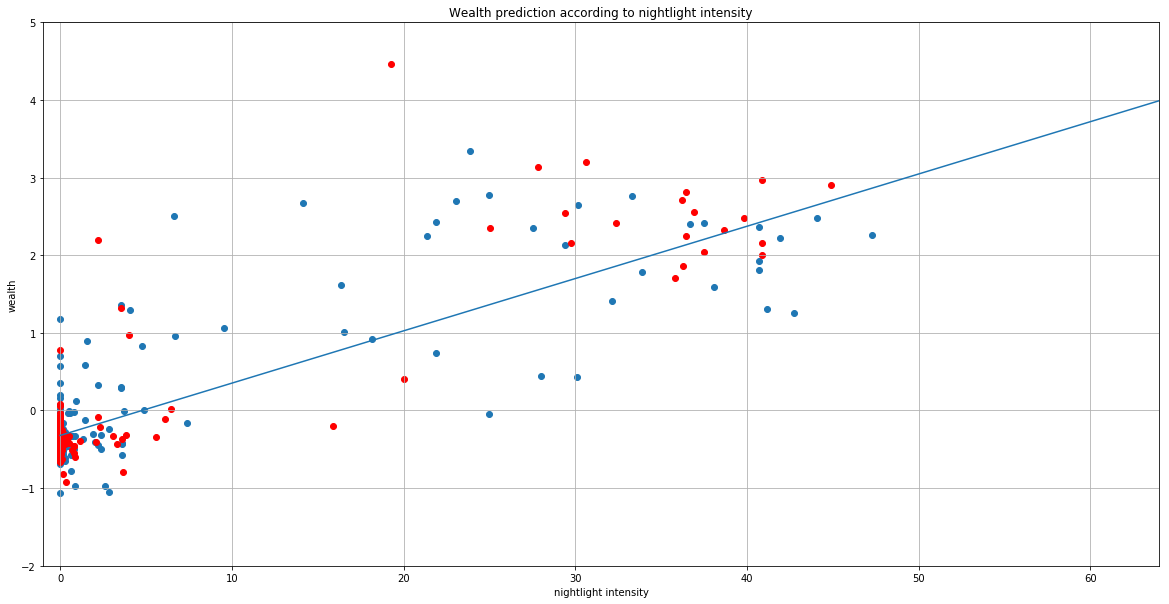

MSE on train data : 0.19
MSE on test data : 0.19
R2-score : 0.78


In [80]:
estimator = BayesianRidge()
estimator.fit(X_train, y_train)

plot_regression(estimator, X_train, y_train, X_test, y_test)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

# Deep features data

In [59]:
df_rwanda = pd.read_pickle('./data/rwanda_deep.csv')

X = np.array([df_rwanda['features'].values[i] for i in range(df_rwanda['features'].values.shape[0])])
X = np.concatenate([X, df_rwanda['mean_light'].values.reshape((-1, 1))], axis=1)
y = df_rwanda['wealth_index'].values.reshape((-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Deep features prediction

In [60]:
estimator = LinearRegression()
estimator.fit(X_train, y_train)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

MSE on train data : 0.0
MSE on test data : 0.34
R2-score : 0.62


In [74]:
estimator = RidgeCV(alphas=np.logspace(3, 4, 1000))
estimator.fit(X_train, y_train)

print('alpha = ', estimator.alpha_)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

alpha =  2314.005380130654
MSE on train data : 0.13
MSE on test data : 0.24
R2-score : 0.74


In [73]:
estimator = LassoCV(alphas=np.logspace(-2, 0, 10))
estimator.fit(X_train, y_train)

print('alpha = ', estimator.alpha_)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

/home/ridouane/anaconda3/envs/computer-vision/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ridouane/anaconda3/envs/computer-vision/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


alpha =  0.3593813663804626
MSE on train data : 0.19
MSE on test data : 0.21
R2-score : 0.77


In [63]:
estimator = BayesianRidge()
estimator.fit(X_train, y_train)

print('MSE on train data :', round(mean_squared_error(y_train, estimator.predict(X_train)), 2))
print('MSE on test data :', round(mean_squared_error(y_test, estimator.predict(X_test)), 2))
print('R2-score :', round(r2_score(y_test, estimator.predict(X_test)), 2))

/home/ridouane/anaconda3/envs/computer-vision/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE on train data : 0.0
MSE on test data : 0.34
R2-score : 0.62
